# Multiple Linear Regression Model 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

In [12]:
df = pd.read_csv('final_data.csv')

In [17]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df.columns

Index(['Unnamed: 0', 'age', 'bmi', 'children', 'charges', 'sex_male',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast'],
      dtype='object')

## Using Linear Rergression

In [5]:
X = df.drop(columns='charges')
y = df['charges']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:

scaler2 = StandardScaler()

X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled  = scaler2.transform(X_test)

NameError: name 'X_train' is not defined

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred = model.predict(X_test_scaled)

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score :", r2)
print("MAE      :", mae)

R2 Score : 0.7256357058672676
MAE      : 4373.0630186731505


## Using DecisionTreeRegressor

In [23]:
X = df.drop(columns='charges')
y = df['charges']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [26]:
y_pred = dt.predict(X_test)

In [27]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.8514148520282707


In [39]:
class MyMultipleLinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []
        

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.epochs):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Errors
            error = y_pred - y
            # Gradients
            dw = (2/n_samples) * np.dot(X.T, error)
            db = (2/n_samples) * np.sum(error)

            # Update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Loss
            loss = np.mean(error**2)
            self.loss_history.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def rmse(self, y_true, y_pred):
        return np.sqrt(self.mse(y_true, y_pred))

    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

In [32]:
X = df[['age','bmi','children','sex_male',
        'smoker_yes','region_northeast',
        'region_northwest','region_southeast']]

y = df['charges'].values

In [33]:
# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [40]:
model = MyMultipleLinearRegression(lr=0.01, epochs=2000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print("MSE:", model.mse(y_test, y_pred))
print("RMSE:", model.rmse(y_test, y_pred))
print("R2 Score:", model.r2_score(y_test, y_pred))

MSE: 38442612.13221445
RMSE: 6200.210652245168
R2 Score: 0.7267752170428339


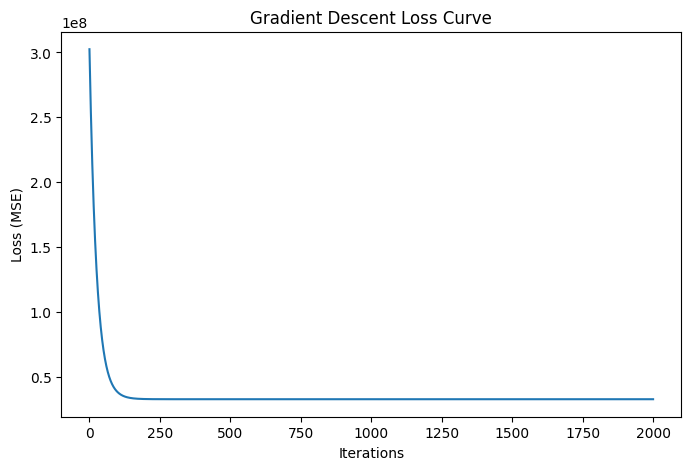

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Gradient Descent Loss Curve")
plt.show()

MSE: 38290381.202603705
RMSE: 6187.922203987677
R2 Score: 0.72785717428755


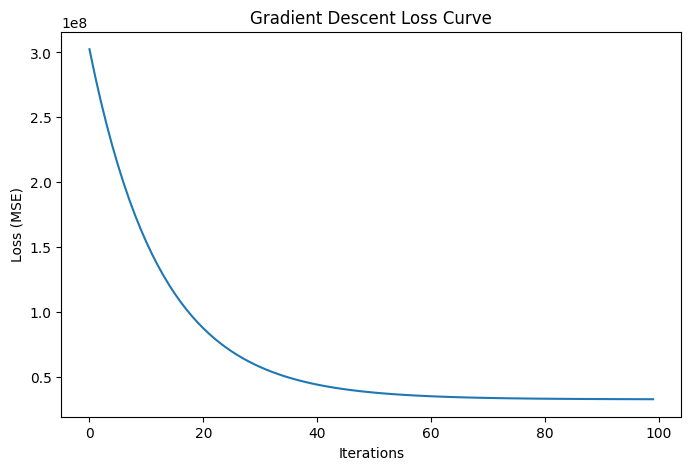

In [42]:
model = MyMultipleLinearRegression(lr=0.02, epochs=100)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print("MSE:", model.mse(y_test, y_pred))
print("RMSE:", model.rmse(y_test, y_pred))
print("R2 Score:", model.r2_score(y_test, y_pred))
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Gradient Descent Loss Curve")
plt.show()

MSE: 38381711.67170367
RMSE: 6195.29754505009
R2 Score: 0.7272080574296376


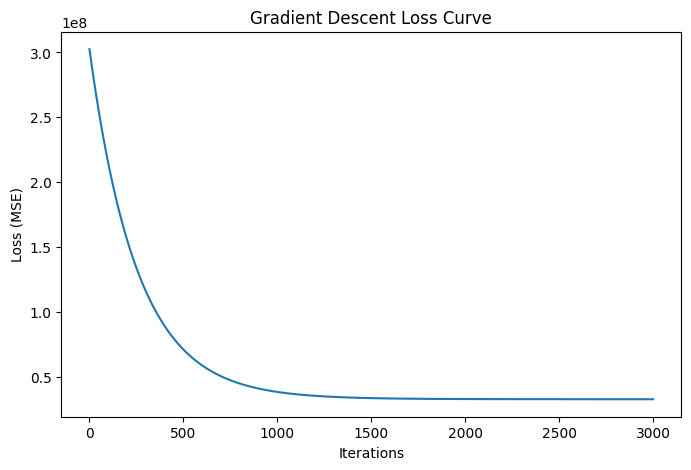

In [47]:
model = MyMultipleLinearRegression(lr=0.001, epochs=3000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print("MSE:", model.mse(y_test, y_pred))
print("RMSE:", model.rmse(y_test, y_pred))
print("R2 Score:", model.r2_score(y_test, y_pred))
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Gradient Descent Loss Curve")
plt.show()

MSE: 64100437.094176844
RMSE: 8006.274857521245
R2 Score: 0.5444162859620153


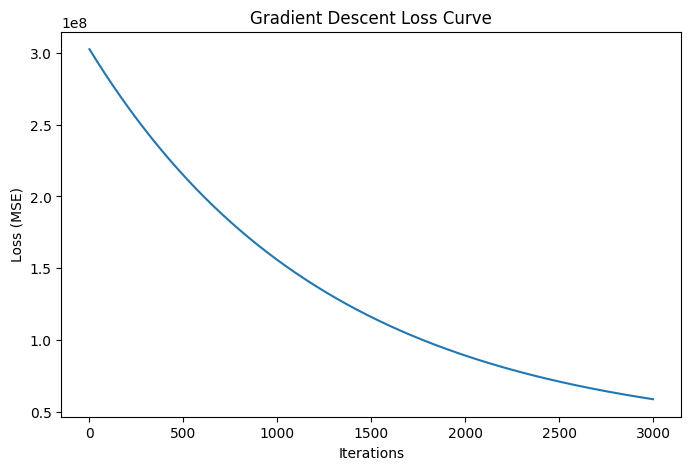

In [53]:
model = MyMultipleLinearRegression(lr=0.0002, epochs=3000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print("MSE:", model.mse(y_test, y_pred))
print("RMSE:", model.rmse(y_test, y_pred))
print("R2 Score:", model.r2_score(y_test, y_pred))
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Gradient Descent Loss Curve")
plt.show()